# Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve
import matplotlib.pyplot  as plt
import functions_ml # ma biblio personnelle
import pickle

# Données

Les données ont été extraites d'images prises à partir de spécimens authentiques et falsifiés ressemblant à des billets de banque.

Pour la numérisation, une caméra industrielle habituellement utilisée pour l'inspection des impressions a été utilisée. 

Les images finales ont 400x 400 pixels. En raison de la lentille de l'objet et de la distance à l'objet étudié, des images en niveaux de gris avec une résolution d'environ 660 dpi ont été obtenues. 

L'outil Wavelet Transform a été utilisé pour extraire les caractéristiques des images.
L'ensemble de données peut être utilisé pour les exemples de problèmes de classification binaire

In [2]:
data=pd.read_csv(r'C:\Users\u32118508\OneDrive - UPEC\Bureau\PyBooks\Bank_Note_Authentification\donnee_billet_authentification.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Echantillonage et partitionnements

In [3]:
## declarations des features et de la variable d'interets
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
##  Segmentation des données
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2022, stratify = y)

# Entrainement

In [4]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train,y_train)

LinearDiscriminantAnalysis()

# EVAL

In [5]:
# Prediction
proba_pred = classifier.predict_proba(X_test)

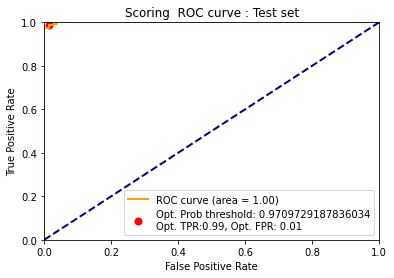

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, proba_pred[:,1])
roc_auc = auc(fpr, tpr)
optimal_thr = thresholds[np.argmin((0-fpr)**2 + (1-tpr)**2)]
optimal_tpr = tpr[thresholds==optimal_thr][0]
optimal_fpr = fpr[thresholds==optimal_thr][0]
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter(optimal_fpr, optimal_tpr, color="red", lw=lw, label=f"Opt. Prob threshold: {optimal_thr}\nOpt. TPR:{round(optimal_tpr, 2)}, Opt. FPR: {round(optimal_fpr, 2)}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scoring  ROC curve : Test set')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.99
Recall: 0.99
precision: 0.98


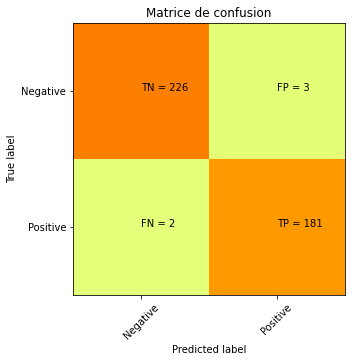

In [7]:
functions_ml.confusio_matrix(y_test, (proba_pred[:,1]>= optimal_thr).astype(int))

# Exportation du modèle

In [8]:
pickle_out = open("model.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()